In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [12]:
df=pd.read_csv("height-weight.csv")

In [13]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


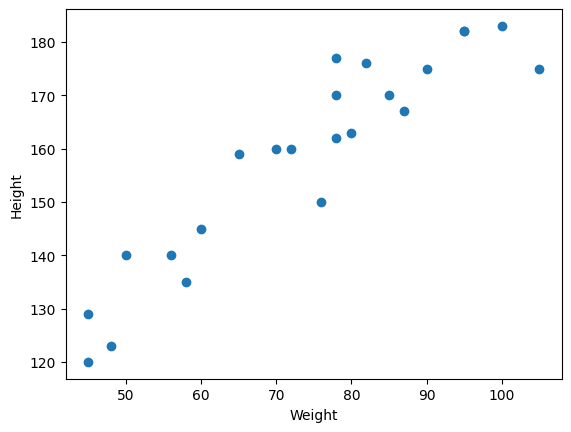

In [15]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [16]:
# Problem statement >> I want to predict height based in weight

In [21]:
# divide the data into x and y

x=df[['Weight']]
y=df['Height']

In [22]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [23]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [25]:
# Train Test split

from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=1)

In [31]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [32]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [33]:
y_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [34]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140


In [35]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [36]:
# Scalling ( optional )
# Standardization >> fit transform in train data and transform on test data if you use fit on test data,(that is wrong) you are doing leakage, avoid it
# most of the m,l model standardsclaer is used as it with normal distribution.





In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [42]:
scaler

StandardScaler()

In [43]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [44]:
# scaling should be done always after train test split
# target var should not be scaled.
# avoid scale categorical feature.
# fit transform

In [46]:
x_train= scaler.fit_transform(x_train)

In [47]:
x_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [49]:
x_test=scaler.transform(x_test)

In [50]:
x_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

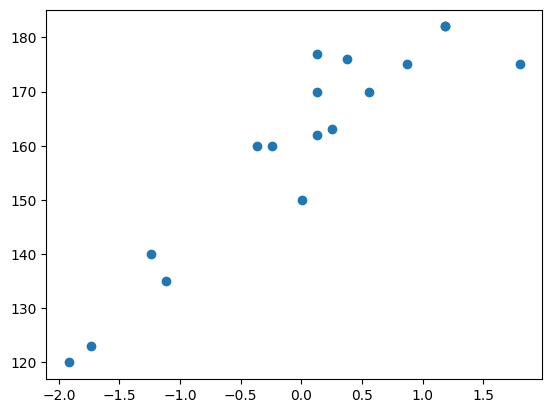

In [53]:
# scale is optional >> why because it doesnt affect the distribution of the data


plt.scatter(x_train,y_train)

In [54]:
# model training

from sklearn.linear_model import LinearRegression

# Linear Reg parameters

# fit_intercept >> the best fit line will have intercept, by default it is true

# copy_x >> copy the original x_train and then build the model, it will not modify the original data

# n_jobs >> using all the processor.

# positive >> forces the coefficient to be positive.

# fit >> train the model

# predict >> to test the model

# after buiilding the model, you have attr of the model
# coef_
# intercept

In [55]:
regressor = LinearRegression()

In [56]:
regressor

LinearRegression()

In [57]:
regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
regressor.coef_

array([17.7307072])

In [61]:
regressor.intercept_

160.0

In [63]:
print("The slope of coeff of the model is :", regressor.coef_)
print("The intercept of the model is :", regressor.intercept_)

The slope of coeff of the model is : [17.7307072]
The intercept of the model is : 160.0


In [64]:
# prediction on train data

# interpretation of coef >> one unit increase in wt on an avg the height is increase to 17.73 units.

# predicted height(y) = 160 + 17.73 * (x_train)

In [65]:
# prediction on train data

regressor.predict(x_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

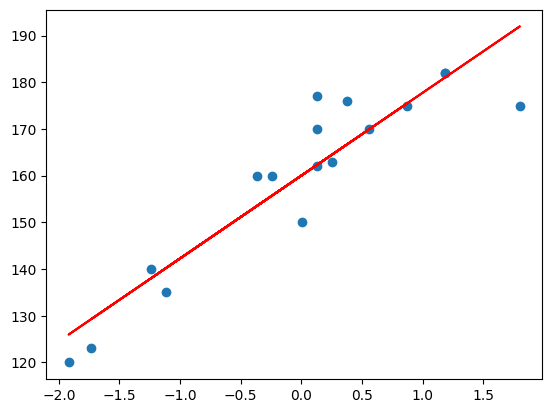

In [67]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.show()

In [68]:
y_pred_test = regressor.predict(x_test)

In [69]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [70]:
y_pred_test, y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

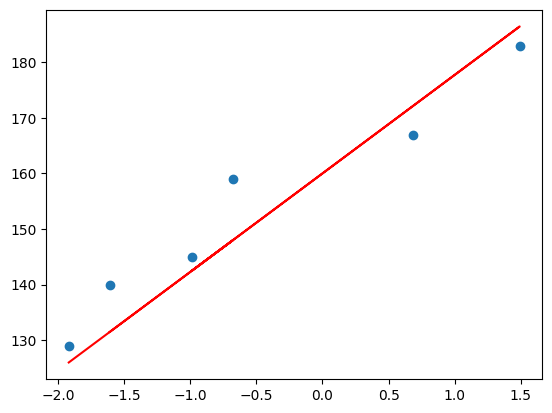

In [73]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),color='red')
plt.show()

In [74]:
# performance metrics

In [76]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [77]:
mean_absolute_error(y_test,y_pred_test)

5.608571289304838

In [78]:
mean_squared_error(y_test,y_pred_test)

41.285662830455514

In [85]:
r2 = r2_score(y_test,y_pred_test)

In [86]:
r2

0.8721036174256606

In [81]:
# adjusted r2

# R2 = (1-(1-r2) * (n-1))/(n-k-1) # n is no of observation and k is the no of predictor var

In [83]:
x_test.shape[0] # row

6

In [84]:
x_test.shape[1] # column

1

In [87]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# adjusted r2 is always be lesser than r2

0.8401295217820757

In [88]:
# Asssumptions

# x-y should have linear rel
# observation should have no rel
# error should have constant variation
# error should be normally distributed
# features among themselves should be least related

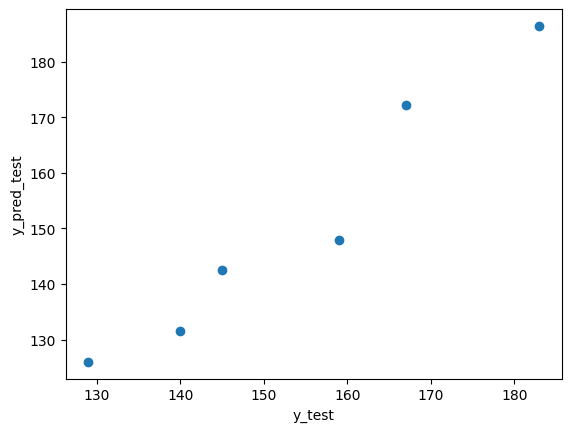

In [89]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.show()

In [90]:
error = y_test-y_pred_test
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


<ipython-input-91-799f8cdd73a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Height', ylabel='Density'>

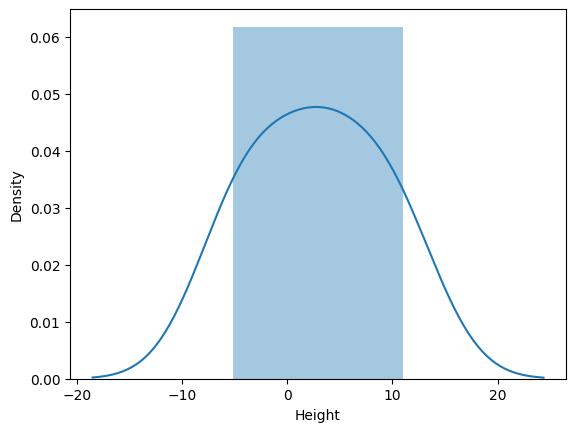

In [91]:
sns.distplot(error)

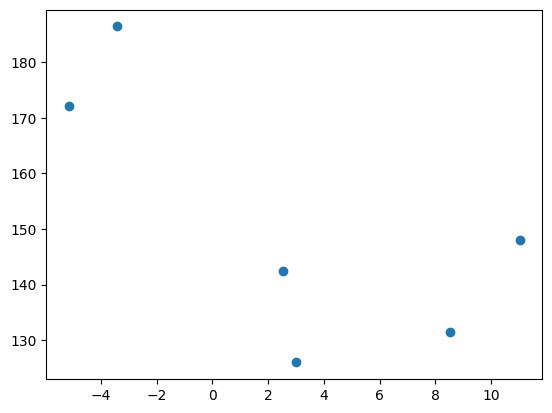

In [92]:
# to check constant var

plt.scatter(error, y_pred_test)
plt.show()